# Cyberbully Dataset Analysis

This Python Notebook covers the analysis of the Kaggle Dataset. The sections are divided as follows:

- Ratio of True Positive (Bully) to True Negative (Non-bully)
- Analysis of comment length 
- Analysis of word frequency and total unique words
- Wordclouds for bully, non-bully and full dataset

In [1]:
# Load the dataset with Pandas library
import pandas as pd

FILE = "C:/Users/MyPC/Desktop/Vegito/clean_dataset.csv"
df = pd.read_csv(FILE)

In [2]:
# Dataset information
print("Size:\t\t",len(df))
print("Cyberbully: \t",df['Insult'].sum())

# Create dataframe for percentages
bully_perc = round(df['Insult'].sum()/len(df), 4)*100
normal_perc = 100 - bully_perc

dict = {'Percentage': pd.Series([bully_perc, normal_perc]), 
       'Insult': pd.Series(['Cyberbully', 'Normal'])}

perc_df = pd.DataFrame(dict)

Size:		 6580
Cyberbully: 	 1742


In [3]:
# Import libraries for visualisation

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set_style('darkgrid')
%matplotlib inline

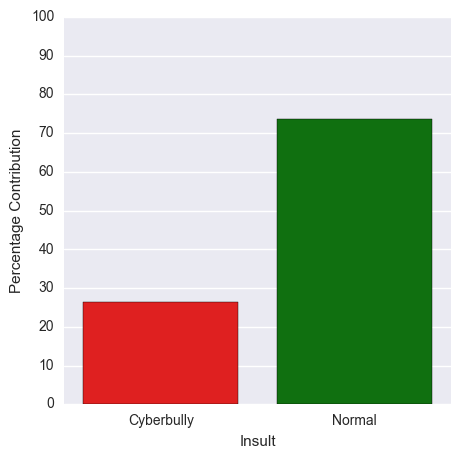

In [4]:
# Visualize number of Bully and Non-Bully comments

fig, (axis1) = plt.subplots(1,1,figsize=(5,5))

sns.barplot(x='Insult', y='Percentage', data=perc_df, ax=axis1, palette=['red','green'])
axis1.yaxis.set_major_locator(ticker.MultipleLocator(10))
plt.ylim(0,100,10)
plt.ylabel('Percentage Contribution')

In [5]:
# Function to count unique number of words and their occurrences
# This is followed by sorting them in descending order
import operator

def countUniqueWords(df):
    
    # Create a dictionary
    unique_words = {}

    # Iterate comment by comment
    for comment in df['Comment']:

        # Iterate word by word in comment
        for word in comment.split():

            # If word exists, else add it in
            if word in unique_words.keys():
                unique_words[word] += 1
            else:
                unique_words[word] = 1
                
    # Sort them in Descending order
    unique_words_sorted = sorted(unique_words.items(), key=operator.itemgetter(1), reverse = True)
    
    return unique_words_sorted

In [6]:
# Get two lists: All comments and Cyberbully comments
cyberbully_df = df[df.Insult == 1]
cyberbully_df.reset_index(inplace=True, drop=True)

non_cyberbully_df = df[df.Insult == 0]
non_cyberbully_df.reset_index(inplace=True, drop=True)

# Get the words and their count
non_cyberbully_list = countUniqueWords(non_cyberbully_df)
cyberbully_list = countUniqueWords(cyberbully_df)

print(len(non_cyberbully_list))
print(len(non_cyberbully_df))
print("=====")
print(len(cyberbully_list))
print(len(cyberbully_df))

17163
4838
=====
6430
1742


In [7]:
# What is the maximum/minimum number of words from ALL comments and Cyberbully comments
# First: Create a function that returns max/min number of words from a list of comments
# Second: Return the index of that comment and view in dataframe (JUST IN CASE)

def maxWords(df):
    
    max_words = 0
    index = 0
    
    for i, comment in enumerate(df['Comment']):
        
        if len(comment.split()) > max_words:
            max_words = len(comment.split())
            index = i
    
    return max_words, index

def minWords(df):
    
    # Random value
    min_words = 1000
    index = 0
    
    for i, comment in enumerate(df['Comment']):
        
        if len(comment.split()) < min_words:
            min_words = len(comment.split())
            index = i
            
    return min_words, index

In [8]:
# Get the max and the index of the max
non_cyberbully_comments_max = maxWords(non_cyberbully_df)
cyberbully_comments_max = maxWords(cyberbully_df)

# Get the min and the index of the min
non_cyberbully_comments_min = minWords(non_cyberbully_df)
cyberbully_comments_min = minWords(cyberbully_df)

# Print them
print("Full Dataset(MAX): ",non_cyberbully_comments_max)
print("Full Dataset(MIN): ",non_cyberbully_comments_min)
print("======================================")
print("Cyberbully set(MAX): ",cyberbully_comments_max)
print("Cyberbully set(MIN): ",cyberbully_comments_min)

Full Dataset(MAX):  (2277, 1486)
Full Dataset(MIN):  (1, 444)
Cyberbully set(MAX):  (730, 850)
Cyberbully set(MIN):  (1, 12)


In [9]:
# View those comments
print(non_cyberbully_df['Comment'][444])

twss


In [10]:
# Get the average length of words from ALL comments and Cyberbully comments
# First: Create a function that totals all the words
# Second: Average the total by length of respective dataframe

def averageWords(df):
    
    total_comments = len(df)
    total_words = 0
    
    for comment in df['Comment']:
        
        total_words += len(comment.split())
        
    return round(total_words/total_comments)

In [11]:
# Get the averages and print them
non_cyberbully_comments_avg = averageWords(non_cyberbully_df)
cyberbully_comments_avg = averageWords(cyberbully_df)

print("AVERAGE SENTENCE LENGTH(NON-CYBERBULLY): ",non_cyberbully_comments_avg)
print("AVERAGE SENTENCE LENGTH(CYBERBULLY): ",cyberbully_comments_avg)

AVERAGE SENTENCE LENGTH(NON-CYBERBULLY):  36
AVERAGE SENTENCE LENGTH(CYBERBULLY):  27


In [12]:
# Count how many sentences are more than the average
# First: Create a function that takes in respective dataframe
# Second: Count comments that are MORE than the average

def moreThanAverage(df, avg):
    
    count = 0
    
    for comment in df['Comment']:
        
        if len(comment.split()) > avg:
            count += 1
            
    return count

In [13]:
# Get the counts
non_cyberbully_avg_counts = moreThanAverage(non_cyberbully_df, non_cyberbully_comments_avg)
cyberbully_avg_counts = moreThanAverage(cyberbully_df, cyberbully_comments_avg)

# Print them 
print("All comments: %d/%d" % (non_cyberbully_avg_counts, len(non_cyberbully_df)))
print("Cyberbully comments: %d/%d" % (cyberbully_avg_counts, len(cyberbully_df)))

All comments: 1306/4838
Cyberbully comments: 531/1742


In [14]:
# Create word cloud for both cyberbully and non-cyberbully
from wordcloud import WordCloud
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

def generateWordCloud(word_list, title):
    
    background_col= "black"
    print(len(word_list))
    word_cloud = WordCloud(background_color=background_col).generate_from_frequencies(word_list)

    plt.imshow(word_cloud)
    plt.axis("off")
    plt.title(title + " COMMENTS WITH STOPWORDS")
    plt.show()

    # Check if words are filtered properly
    stop_words = list(ENGLISH_STOP_WORDS)

    new_list = []
    count = 0
    for pair in cyberbully_list:

        if pair[0] not in stop_words:
            count += 1
            new_list.append((pair[0], pair[1]))

    print("AFTER FILTERING: ", len(new_list))
    word_cloud = WordCloud(background_color=background_col).generate_from_frequencies(new_list)

    plt.imshow(word_cloud)
    plt.axis("off")
    plt.title(title + " COMMENTS WITHOUT STOPWORDS")
    plt.show()

6430


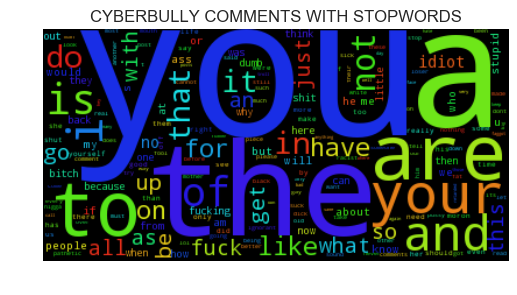

AFTER FILTERING:  6169


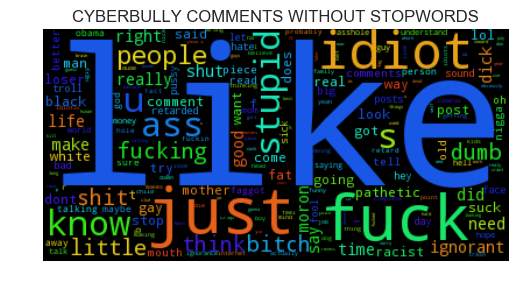

In [15]:
# Generate word clouds for CYBERBULLY WORDS
generateWordCloud(cyberbully_list, "CYBERBULLY")

17163


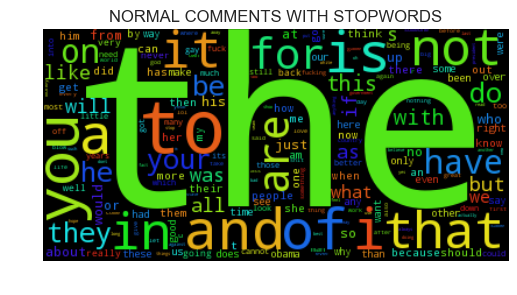

AFTER FILTERING:  6169


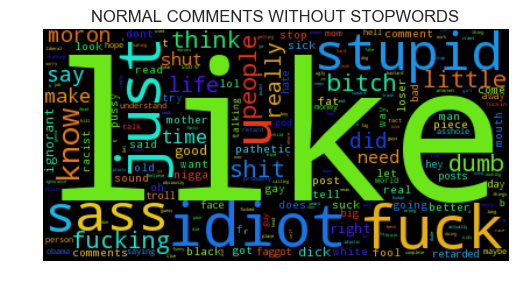

In [16]:
# Generate word cloud for normal comments
generateWordCloud(non_cyberbully_list, "NORMAL")

In [17]:
# Count the TOTAL number of words in the dataset
# Count the TOTAL UNIQUE number of words in the dataset
total_words = 0
unique_words = []

for comment in df['Comment']:
    
    # Append total words
    total_words += len(comment.split())
    
    # Loop over word and check if unique
    for word in comment.split():
        if word not in unique_words:
            unique_words.append(word)
            
print("TOTAL WORDS: ", total_words)
print("TOTAL UNIQUE WORDS: ", len(unique_words))
print("MAGNITUDE: ", round(total_words/len(unique_words)))

TOTAL WORDS:  222529
TOTAL UNIQUE WORDS:  19286
MAGNITUDE:  12
